# EuroSAT Classification — Train classifier

This notebook trains a **ResNet18 model** or **Simple CNN** on the **EuroSAT Dataset** using the dataloader and training functions from *./src*.

### 1. Setup environment and imports

In [ ]:
import sys, os
if not hasattr(sys, "frozen"):
    os.environ["PYDEVD_DISABLE_FILE_VALIDATION"] = "1"
import torch
from torchvision import models
import torch.nn as nn

sys.path.append(os.path.abspath("..")) 
from src.training.train import train_model
from src.training.evaluate import evaluate_model, plot_confusion_matrix



device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

model_name = "simplecnn" # or resnet18
data_dir = '../data/raw'
checkpoint_dir = '../experiments/checkpoints'

Using device: cpu


In [2]:
if model_name == "simplecnn":
        checkpoint_path = "../experiments/checkpoints/simplecnn_best.pth"
        epochs = 10
elif model_name == "resnet18":
    checkpoint_path = "../experiments/checkpoints/resnet18_best.pth"
    epochs = 5


### 2. Train baseline SimpleCNN / ResNet18 model

In [ ]:
model, classes = train_model(
    data_dir=data_dir,
    batch_size=64,
    epochs=epochs,
    lr=1e-4,
    model_name=model_name, 
    output_dir=checkpoint_dir
)

print(f"\nTraining completed. Number of classes: {len(classes)}")

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x10957dda0>
Traceback (most recent call last):
  File "/Users/joseantonioruizheredia/Code/Python/ml-satellite-adv/.venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py", line 1654, in __del__
    self._shutdown_workers()
  File "/Users/joseantonioruizheredia/Code/Python/ml-satellite-adv/.venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py", line 1618, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/opt/homebrew/Cellar/python@3.13/3.13.5/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/process.py", line 149, in join
    res = self._popen.wait(timeout)
  File "/opt/homebrew/Cellar/python@3.13/3.13.5/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/popen_fork.py", line 41, in wait
    if not wait([self.sentinel], timeout):
  File "/opt/homebrew/Cellar/python@3.13/3.13.5/Frameworks/Python.framework/Versions/3.1

: 

### 3. Evaluate final metrics on Test Dataset

In [3]:
metrics = evaluate_model(
    model_path=checkpoint_path,
    data_dir=data_dir,
    batch_size=64,
    model_name=model_name,
    device=device
)


- Metrics

In [4]:
print(f"Test Accuracy: {metrics['accuracy']*100:.2f}%")
print(f"Test Loss: {metrics['loss']:.4f}")
print(f"Precision: {metrics['precision']:.4f}")
print(f"Recall: {metrics['recall']:.4f}")
print(f"F1-score: {metrics['f1']:.4f}")

print("\nClassification metrics per category:\n\n", metrics["classification_report"])


Test Accuracy: 66.00%
Test Loss: 0.9615
Precision: 0.6568
Recall: 0.6555
F1-score: 0.6521

Classification metrics per category:

                       precision    recall  f1-score   support

          AnnualCrop     0.6528    0.5975    0.6239       472
              Forest     0.8330    0.8462    0.8395       442
HerbaceousVegetation     0.4901    0.4345    0.4606       458
             Highway     0.5709    0.4015    0.4715       391
          Industrial     0.8133    0.8757    0.8433       378
             Pasture     0.5986    0.5585    0.5779       299
       PermanentCrop     0.4487    0.4960    0.4712       379
         Residential     0.7469    0.9311    0.8289       450
               River     0.4731    0.5867    0.5238       375
             SeaLake     0.9412    0.8276    0.8807       406

            accuracy                         0.6600      4050
           macro avg     0.6568    0.6555    0.6521      4050
        weighted avg     0.6608    0.6600    0.6563      4050


- Confusion Matrix

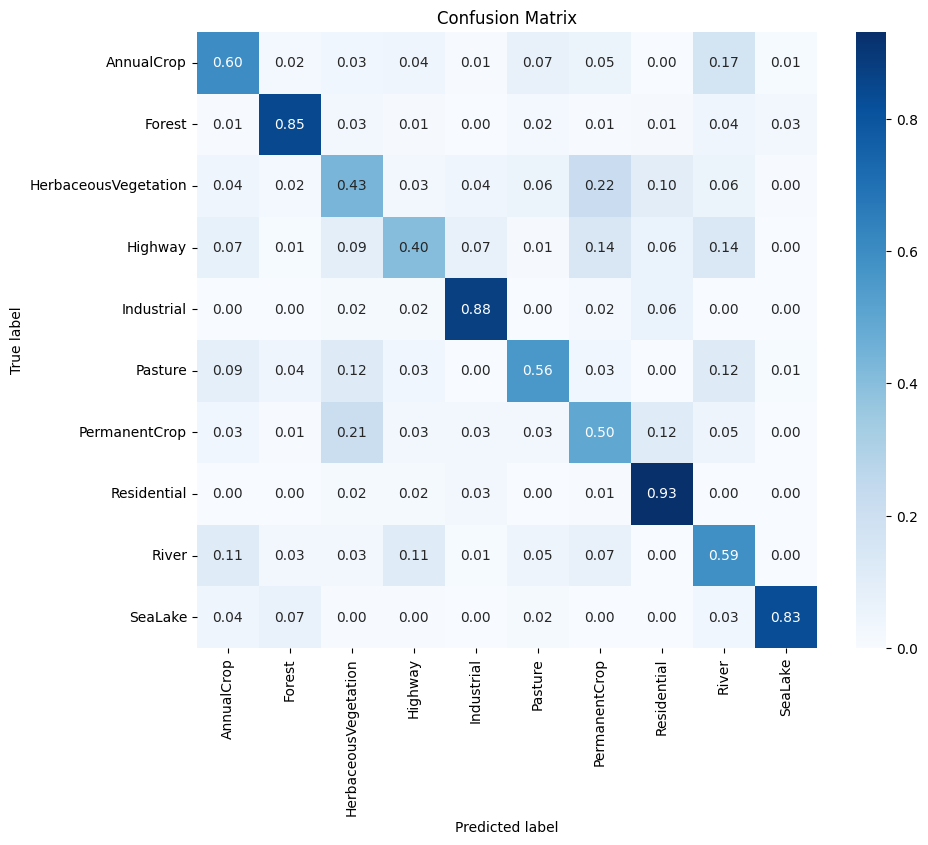

In [5]:
plot_confusion_matrix(metrics["confusion_matrix"], metrics["class_names"])
